In [17]:
# import lib
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import mannwhitneyu

## 1. Scipy
### Linear Algebra
#### a. Define a matrix A

In [18]:
A = np.array([[2, 4, -1], 
              [-3, 7, 5], 
              [6, 0, 8]])

print(A)

[[ 2  4 -1]
 [-3  7  5]
 [ 6  0  8]]


#### b. Define a vector b

In [19]:
b = np.array([2, 4, 7])


#### c. Solve the linear system of equations A x = b

In [20]:
x = linalg.solve(A, b)
x

array([0.46756757, 0.3972973 , 0.52432432])

#### d. Check that your solution is correct by plugging it into the equation

In [21]:
np.dot(A, x) == b

array([False,  True,  True])

#### e. Repeat steps a-d using a random 3x3 matrix B (instead of the vector b)

In [22]:
B = np.random.randint(0, 10, (3, 3))
x = linalg.solve(A, B)
B_hat = np.dot(A, x)

In [23]:
B

array([[7, 0, 9],
       [0, 6, 2],
       [1, 7, 7]])

In [24]:
B_hat

array([[ 7.00000000e+00, -1.11022302e-15,  9.00000000e+00],
       [ 4.44089210e-16,  6.00000000e+00,  2.00000000e+00],
       [ 1.00000000e+00,  7.00000000e+00,  7.00000000e+00]])

#### f. Solve the eigenvalue problem for the matrix A and print the eigenvalues and eigenvectors

In [25]:
eigvalA = linalg.eigvals(A)
eigvecAL = linalg.eig(A, left=True, right=False)[1]
eigvecAR = linalg.eig(A, left=False, right=True)[1]

print('Eigenvalues of A:\n', eigvalA)
print('Normalized left eigenvector of A:\n', eigvecAL)
print('Normalized right eigenvector of A:\n', eigvecAR)

Eigenvalues of A:
 [ 3.28502117+4.96823635j  3.28502117-4.96823635j 10.42995765+0.j        ]
Normalized left eigenvector of A:
 [[-0.75789748+0.j         -0.75789748-0.j          0.3980144 +0.j        ]
 [ 0.29264535-0.39137j     0.29264535+0.39137j     0.46416247+0.j        ]
 [-0.01599638+0.43188397j -0.01599638-0.43188397j  0.79128866+0.j        ]]
Normalized right eigenvector of A:
 [[ 0.09022837-0.57322376j  0.09022837+0.57322376j  0.26242026+0.j        ]
 [ 0.63630533+0.j          0.63630533-0.j          0.71503856+0.j        ]
 [-0.41863515+0.2883288j  -0.41863515-0.2883288j   0.64796255+0.j        ]]


#### g. Calculate the inverse, determinant of A

In [26]:
A_inv = linalg.inv(A)
print('Inverse of A:\n', A_inv)

Inverse of A:
 [[ 0.15135135 -0.08648649  0.07297297]
 [ 0.14594595  0.05945946 -0.01891892]
 [-0.11351351  0.06486486  0.07027027]]


In [27]:
detA = linalg.det(A)
print('Determinant of A:\n %.2f' %detA)

Determinant of A:
 370.00


In [28]:
detA_inv = linalg.det(A_inv)
print('Determinant of A^{-1}:\n %.4f' %detA_inv)

Determinant of A^{-1}:
 0.0027


#### h. Calculate the norm of A with different orders

In [29]:
norm_A = linalg.norm(A)
print('Norm of A:\n %.2f' %norm_A)

norm_A = linalg.norm(A,'nuc')
print('Nuclear norm of A:\n %.2f' %norm_A)

norm_A = linalg.norm(A,1)
print('First order norm of A:\n %.2f' %norm_A)

norm_A = linalg.norm(A,2)
print('Second order norm of A:\n %.2f' %norm_A)

Norm of A:
 14.28
Nuclear norm of A:
 23.28
First order norm of A:
 14.00
Second order norm of A:
 10.81


### Statistics
#### a. Create a discrete random variable with poissonian distribution and plot its probability mass function (PMF), cummulative distribution function (CDF) and a histogram of 1000 random realizations of the variable

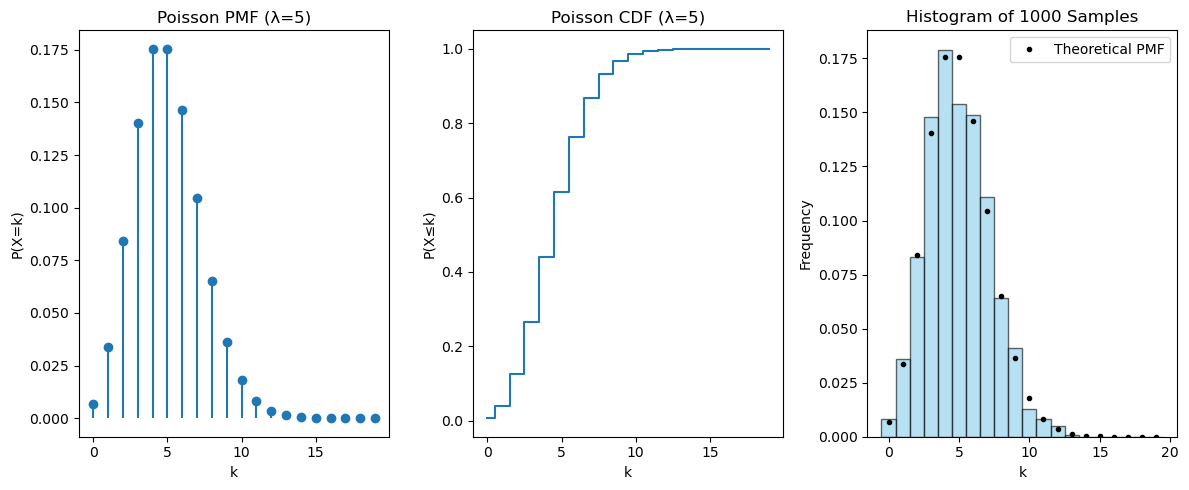

In [30]:


# Define Poisson distribution with mean (λ) = 5
lambda_param = 5
rv = poisson(mu=lambda_param)

# Generate values for PMF and CDF
x = np.arange(0, 20)
pmf_values, cdf_values = rv.pmf(x), rv.cdf(x)

# Generate 1000 random samples
samples = rv.rvs(size=1000)

# Create figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Plot PMF
axes[0].stem(x, pmf_values, basefmt=" ")  # Removed unsupported 'use_line_collection' argument
axes[0].set(title='Poisson PMF (λ=5)', xlabel='k', ylabel='P(X=k)')

# Plot CDF
axes[1].step(x, cdf_values, where='mid')
axes[1].set(title='Poisson CDF (λ=5)', xlabel='k', ylabel='P(X≤k)')

# Plot Histogram of samples
axes[2].hist(samples, bins=np.arange(0, 21) - 0.5, density=True, alpha=0.6, color='skyblue', edgecolor='black')
axes[2].plot(x, pmf_values, 'k.', label='Theoretical PMF')
axes[2].set(title='Histogram of 1000 Samples', xlabel='k', ylabel='Frequency')
axes[2].legend()

# Adjust layout and display plot
plt.tight_layout()
plt.show()


#### b. Create a continious random variable with normal distribution and plot its probability mass function (PMF), cummulative distribution function (CDF) and a histogram of 1000 random realizations of the variable

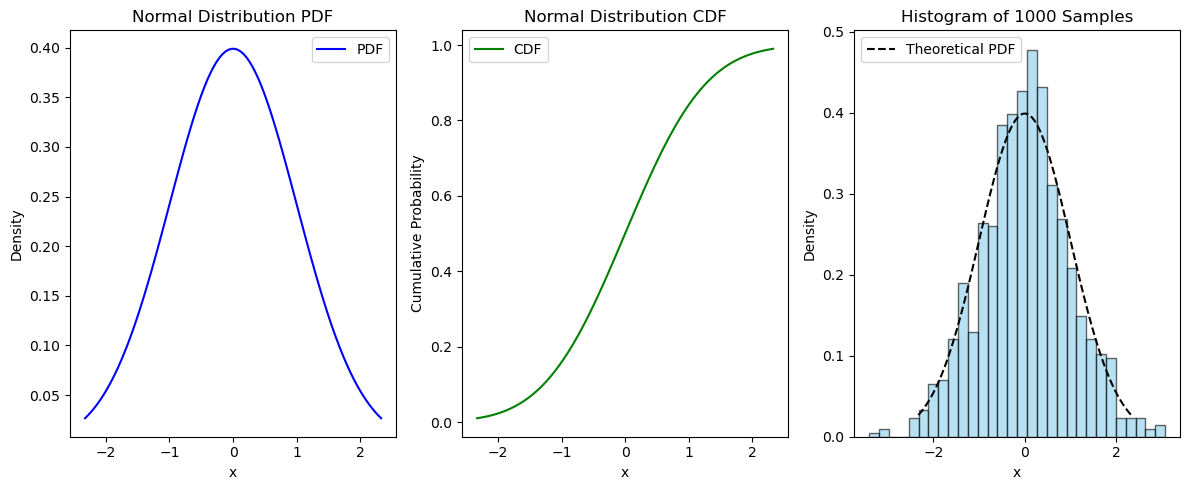

In [31]:


# Create the standard normal distribution
rv = norm()

# Generate values for PDF and CDF
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
pdf_values, cdf_values = rv.pdf(x), rv.cdf(x)

# Generate 1000 random samples
samples = rv.rvs(size=1000)

# Create figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Plot PDF
axes[0].plot(x, pdf_values, label='PDF', color='blue')
axes[0].set(title='Normal Distribution PDF', xlabel='x', ylabel='Density')
axes[0].legend()

# Plot CDF
axes[1].plot(x, cdf_values, label='CDF', color='green')
axes[1].set(title='Normal Distribution CDF', xlabel='x', ylabel='Cumulative Probability')
axes[1].legend()

# Plot Histogram of samples
axes[2].hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
axes[2].plot(x, pdf_values, 'k--', label='Theoretical PDF')
axes[2].set(title='Histogram of 1000 Samples', xlabel='x', ylabel='Density')
axes[2].legend(loc='upper left')

# Adjust layout and display plot
plt.tight_layout()
plt.show()

#### c. Test if two sets of (independent) random data comes from the same distribution

Mann-Whitney U statistic: 358833.00
p-value: 0.00000
The samples come from different distributions.


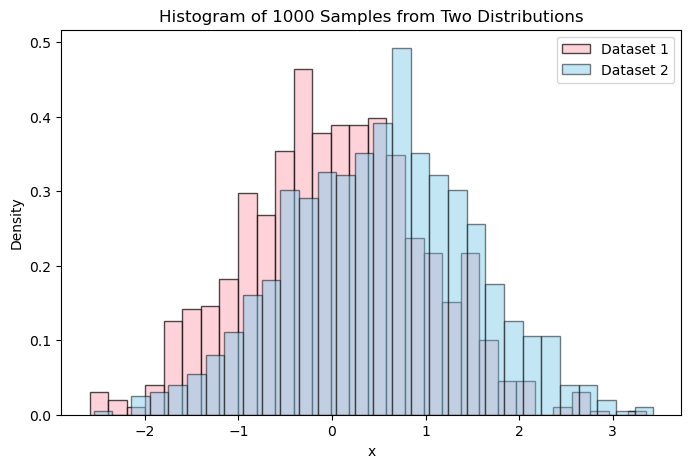

In [32]:


# Generate two sets of independent random data
mu1, sigma1 = 0, 1
mu2, sigma2 = 0.5, 1

set1 = np.random.normal(mu1, sigma1, 1000)
set2 = np.random.normal(mu2, sigma2, 1000)

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(set1, set2)

# Print results
print(f"Mann-Whitney U statistic: {statistic:.2f}")
print(f"p-value: {p_value:.5f}")

# Interpret the result based on a significance level of 0.05
alpha = 0.05
result = "different distributions" if p_value < alpha else "similar distributions"
print(f"The samples come from {result}.")

# Create figure and plot histograms
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(set1, bins=30, density=True, color='pink', alpha=0.7, label='Dataset 1', edgecolor='black')
ax.hist(set2, bins=30, density=True, color='skyblue', alpha=0.5, label='Dataset 2', edgecolor='black')
ax.set(title='Histogram of 1000 Samples from Two Distributions', xlabel='x', ylabel='Density')
ax.legend()

# Show the plot
plt.show()
